<a href="https://colab.research.google.com/github/vf-fontes/intro-cd/blob/master/20200930_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OLIST E-COMMERCE
Autor: Vinicius Fontes

OBJETIVO:  Realizar análise descritiva de um conjunto de Datasets do Marketplace OLIST. Apartir desta análises verificar possibilidade de utilização de algoritmos de Machine Learning para conclusões preditivas.

*   Dataset Original: *https://www.kaggle.com/olistbr/brazilian-ecommerce*

Lista de Datasets:
*  olist_orders_dataset: Informações sobre as compras realizadas => **[DATASET PRINCIPAL]**
* olist_customers_dataset: Informações sobre os clientes bem como sua localização
* olist_geolocation_dataset: Códigos postais das cidades brasileiras e suas geolocalizações
* olist_order_items_dataset: Informações sobre produtos comprados em cada compra
* olist_order_payments_dataset: Informações sobre formas de pagamentos
* olist_order_reviews_dataset: Avaliações realizadas pelos clientes
* olist_products_dataset: Informação sobre os produtos à venda
* olist_sellers_dataset: Informações sobre o vendedor
* product_category_name_translation: Nomes dos produtos em lingua inglesa


# Instalando Bilbiotecas

In [ ]:
!pip install gitly
!pip install fuzzywuzzy
!pip install pycep-correios
!pip install unidecode

# Importando Bibliotecas

In [16]:
# Bibliotecas de Métodos Necessários
import pandas as pd
import numpy as np
from gitly.colab.plot import GitlyPlotter
import plotly.express as px
import pycep_correios
from unidecode import unidecode

# Importando Datasets

In [3]:
df_clientes = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_customers_dataset.csv')
df_geo = pd.read_csv('//content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_geolocation_dataset.csv', encoding='utf8')
df_compra_itens = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_order_items_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_sellers_dataset.csv')
df_cidades_brasil = pd.read_csv('/content/drive/My Drive/PORTIFOLIO/Datasets Importantes/BRAZIL_CITIES.csv', delimiter=';')

# Explorando Dataset de Clientes (Customers)

## Pré-processamento

### Verificando existência de valores nulos

In [4]:
# Verificando existência de valores nulos
df_clientes.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

## Conhecendo o Dataset

In [5]:
# Visualização do Dataset
df_clientes.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Dimensões do dataset
df_clientes.agg(['nunique','count','size'])

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
nunique,99441,96096,14994,4119,27
count,99441,99441,99441,99441,99441
size,99441,99441,99441,99441,99441


## Explorando o Dataset (Clientes)

### Cidades e Estados

In [8]:
# Quais cidades tem no meu dataset
cidades_clientes = np.sort(np.array([df_clientes.customer_city.unique()]))
print('Cidades que há clientes no dataset: ', cidades_clientes)

Cidades que há clientes no dataset:  [['abadia dos dourados' 'abadiania' 'abaete' ... 'zacarias' 'ze doca'
  'zortea']]


In [10]:
# Transformando instâncias de cidades_brasil para minúsuculas e retirando acentos
df_cidades_brasil['CITY'] = df_cidades_brasil.apply(lambda x: x['CITY'].lower(), axis = 1)
df_cidades_brasil['CITY'] = df_cidades_brasil.apply(lambda x: unidecode(x['CITY']), axis = 1)
cidades_brasil = np.array([df_cidades_brasil.CITY])
cidades_brasil = np.sort(cidades_brasil)

In [11]:
# Dimensões dos arrays
print('Quantidade de cidades que há clientes:', cidades_clientes.size)
print('Quantidade de cidades no Brasil :',cidades_brasil.size)
print('Quantidade de cidades que ainda não tem cliente: ',cidades_brasil.size - cidades_clientes.size)
print('Oportunidade de divulgação em %.2f%% das cidades brasileiras'%(((cidades_brasil.size - cidades_clientes.size)/cidades_brasil.size)*100))

Quantidade de cidades que há clientes: 4119
Quantidade de cidades no Brasil : 5573
Quantidade de cidades que ainda não tem cliente:  1454
Oportunidade de divulgação em 26.09% das cidades brasileiras


In [12]:
# Visualizando cidades brasileiras e cidades que há clientes
print('Cidades brasileiras: ', cidades_brasil)
print('Cidades que há clientes: ',cidades_clientes)

Cidades brasileiras:  [['abadia de goias' 'abadia dos dourados' 'abadiania' ... 'zacarias'
  'ze doca' 'zortea']]
Cidades que há clientes:  [['abadia dos dourados' 'abadiania' 'abaete' ... 'zacarias' 'ze doca'
  'zortea']]


In [13]:
# Quais cidades que ainda não tem clientes
cidades_sem_clientes = []
for i in cidades_brasil[0]:
  if i not in cidades_clientes:
    cidades_sem_clientes.append(i)
print('Cidades que não há clientes: ',cidades_sem_clientes)
print(type(cidades_sem_clientes))

Cidades que não há clientes:  ['abadia de goias', 'abel figueiredo', 'abreulandia', 'acara', 'acarape', 'acaua', 'acorizal', 'acrelandia', 'adelandia', 'afonso bezerra', 'afonso cunha', 'afua', 'agricolandia', 'agua azul do norte', 'agua doce do maranhao', 'agua fria', 'aguanil', 'aguas de chapeco', 'agudos do sul', 'aguiar', 'aguiarnopolis', 'aiquara', 'alagoinha do piaui', 'albertina', 'alcantaras', 'alcantil', 'aldeias altas', 'alecrim', 'alenquer', 'algodao de jandaira', 'almadina', 'almeirim', 'aloandia', 'altair', 'altamira do maranhao', 'alto alegre dos parecis', 'alto feliz', 'alto longa', 'alto paraguai', 'alvaraes', 'alvinlandia', 'alvorada de minas', 'alvorada do sul', 'amajari', 'amapa', 'amaral ferrador', 'amaralina', 'amarante do maranhao', 'amatura', 'amorinopolis', 'amparo de sao francisco', 'amparo do serra', 'anahy', 'anajas', 'anajatuba', 'anama', 'anapu', 'anapurus', 'angelandia', 'angelim', 'angico', 'anhanguera', 'anisio de abreu', 'anori', 'antas', 'antonio almei

In [14]:
# Criando um novo Dataframe com dados das cidades não atendidas
df_cidades_sem_clientes = df_cidades_brasil.loc[df_cidades_brasil['CITY'].isin(cidades_sem_clientes)]
df_cidades_sem_clientes.head(3)

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,...,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,abadia de goias,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,69.0,318.0,438.0,517.0,3542.0,416.0,319.0,1843.0,1689.0,0.708,0.687,0.830,0.622,-49.440548,-16.758812,893.60,360.0,842.0,147.26,NaN,NaN,8583.0,Urbano,6.20,27991.25,74750.32,36915.04,145857.60,20554.20,166.41,...,20664.57,Demais serviços,28227691.0,284.0,5.0,1.0,56.0,0.0,2.0,29.0,110.0,26.0,4.0,5.0,0.0,2.0,10.0,12.0,4.0,6.0,6.0,1.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
10,abel figueiredo,PA,0,6780.0,6780.0,0.0,1880.0,1650.0,230.0,5998.0,102.0,471.0,609.0,691.0,3657.0,468.0,1184.0,4168.0,3657.0,0.622,0.625,0.800,0.481,-48.396762,-4.951391,192.76,248.0,43.0,614.13,Amazônia Atlântica,E,7382.0,Intermediário Adjacente,21381.59,5.31,20515.48,27736.46,74947.67,4709.92,79657.59,...,11095.92,"Administração, defesa, educação e saúde públic...",NaN,72.0,0.0,0.0,9.0,0.0,1.0,0.0,41.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,6.0,6.0,0.0,0.0,4.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,11709575.0,279.0,807.0,0.0,NaN,NaN,NaN,1.0
14,abreulandia,TO,0,2391.0,2391.0,0.0,760.0,445.0,315.0,1476.0,21.0,107.0,172.0,182.0,872.0,122.0,13102.0,31281.0,2786.0,0.665,0.700,0.835,0.502,-49.162438,-9.621791,238.86,14.0,29.0,"1,895.21",NaN,NaN,2564.0,Rural Adjacente,20312.55,2108.24,6802.38,16520.91,45744.07,1634.18,47378.25,...,18543.35,"Administração, defesa, educação e saúde públic...",9712530.0,27.0,4.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,318.0,0.0,NaN,NaN,NaN,1.0


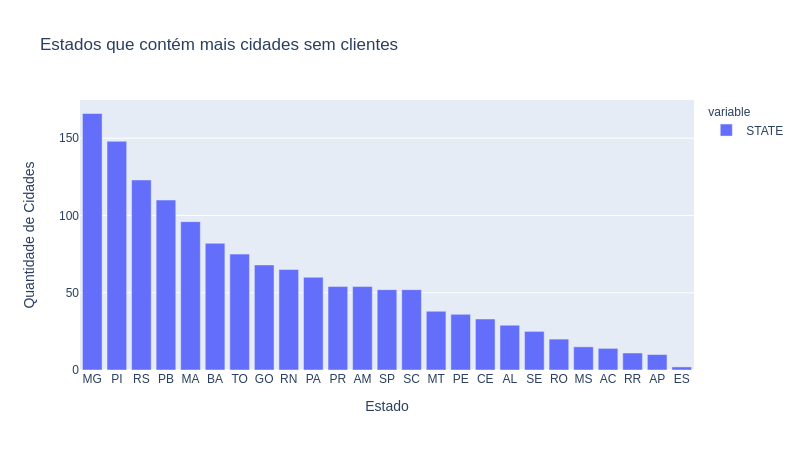

In [128]:
# Estados que contpem mais cidades sem clientes
gitly = GitlyPlotter('github')
data=df_cidades_sem_clientes.STATE.value_counts()
fig = px.bar(data, title='Estados que contém mais cidades sem clientes',labels={'value': 'Quantidade de Cidades', 'index':'Estado'})
gitly.show(fig)

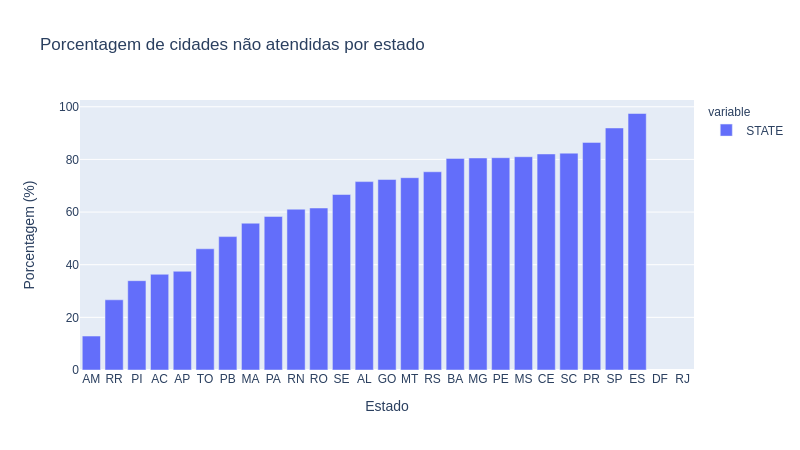

In [174]:
data = 100-((df_cidades_sem_clientes.STATE.value_counts()*100)/df_cidades_brasil.STATE.value_counts())
fig = px.bar(data.sort_values(ascending=True), title='Porcentagem de cidades não atendidas por estado',labels={'value': 'Porcentagem (%)', 'index':'Estado'})
gitly.show(fig)

População total das cidades que não tem clientes cadastrados: 3793954
População total das cidades que não tem clientes cadastrados por estado: 
 STATE
AM    420877.0
PA    374196.0
MA    369939.0
BA    287151.0
MG    285142.0
PB    238491.0
PI    226145.0
SP    183923.0
RN    167405.0
RS    145805.0
GO    136450.0
TO    117577.0
PE    114877.0
CE    112340.0
AL     91377.0
SE     84398.0
PR     82702.0
MT     81079.0
AC     62960.0
SC     55728.0
MS     47935.0
RO     44575.0
RR     32287.0
AP     26620.0
ES      3975.0
Name: IBGE_15-59, dtype: float64


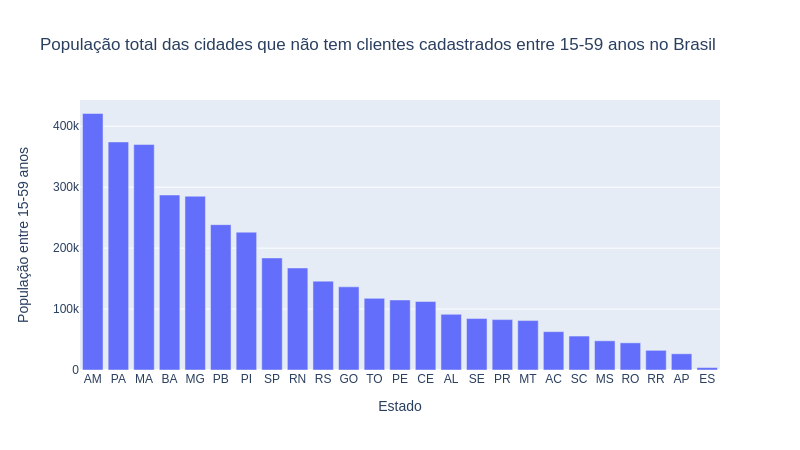

In [144]:
# Levando em consideração que marjoritariamente a população que realiza compras onlines são adolescentes e adultos, 
# podemos considerar que a feature "IBGE_15-59" é o Potencial público alvo que OLIST poderia buscar como clientes
print('População total das cidades que não tem clientes cadastrados: %.i'%df_cidades_sem_clientes['IBGE_15-59'].sum())
print('População total das cidades que não tem clientes cadastrados por estado: \n',df_cidades_sem_clientes.groupby('STATE')['IBGE_15-59'].sum().sort_values(ascending=False))
data=df_cidades_sem_clientes.groupby(by='STATE').sum().sort_values(by='IBGE_15-59',ascending=False)
fig = px.bar(data, y='IBGE_15-59',title='População total das cidades que não tem clientes cadastrados entre 15-59 anos no Brasil',labels={'IBGE_15-59': 'População entre 15-59 anos', 'STATE':'Estado'})
gitly.show(fig)

In [151]:
# Quais estados existe ao menos um cliente em todas as cidades
estados_com_todas_cidades_clientes = []
estados_brasil = df_cidades_brasil.STATE.unique()
estados_com_cidades_sem_clientes = df_cidades_sem_clientes.STATE.unique()
for i in estados_brasil:
  if i not in estados_com_cidades_sem_clientes:
    estados_com_todas_cidades_clientes.append(i)
print('Estados que todas as cidades tem ao menos um cliente: ',estados_com_todas_cidades_clientes)

Estados que todas as cidades tem ao menos um cliente:  ['RJ', 'DF']


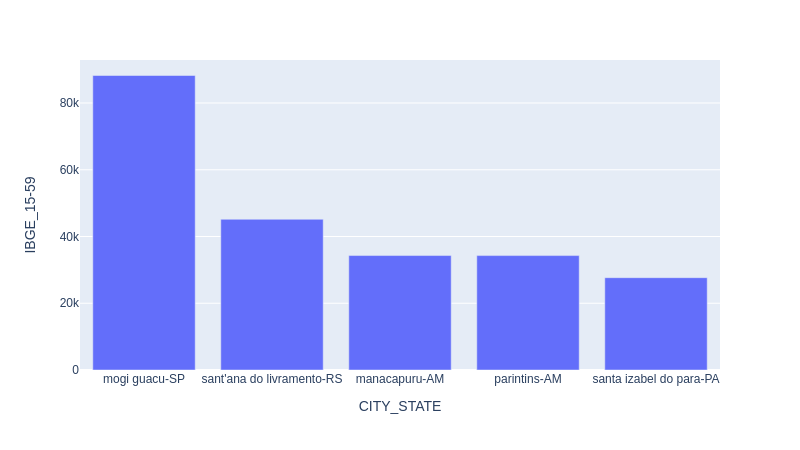

In [137]:
# 5 maiores cidades que não possuem um único cliente
data = df_cidades_sem_clientes[['CITY','IBGE_15-59','STATE']].sort_values('IBGE_15-59',ascending=False).head(5)
data['CITY_STATE']=data['CITY']+'-'+data['STATE']
fig = px.bar(data,x='CITY_STATE',y='IBGE_15-59')
gitly.show(fig)

In [20]:
# Quais estados tem no meu dataset
estados_clientes = df_clientes.customer_state.unique()
print('Estados únicos encontradas no dataset: ', np.sort(estados_clientes))

Estados únicos encontradas no dataset:  ['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']


In [22]:
# Quantidade de estados únicos
print('Quantidade de estados Únicos: ',len(estados_clientes))

Quantidade de estados Únicos:  27


In [23]:
# Quantidade de clientes
print('Quantidade de clientes que já realizaram compras pela OLIST: ', len(df_clientes.customer_id.unique()))

Quantidade de clientes que já realizaram compras pela OLIST:  99441


In [24]:
df_clientes.groupby(by='customer_city').count().sort_values(by='customer_unique_id', ascending=False)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
customer_city,,,,
sao paulo,15540,15540,15540,15540
rio de janeiro,6882,6882,6882,6882
belo horizonte,2773,2773,2773,2773
brasilia,2131,2131,2131,2131
curitiba,1521,1521,1521,1521
...,...,...,...,...
ibiara,1,1,1,1
rio espera,1,1,1,1
rio dos indios,1,1,1,1


In [25]:
df_temp = df_clientes.groupby( by = 'customer_unique_id' ).count()
df_temp.sort_values(by='customer_id', ascending=False)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
8d50f5eadf50201ccdcedfb9e2ac8455,17,17,17,17
3e43e6105506432c953e165fb2acf44c,9,9,9,9
6469f99c1f9dfae7733b25662e7f1782,7,7,7,7
ca77025e7201e3b30c44b472ff346268,7,7,7,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7,7,7,7
...,...,...,...,...
5657dfebff5868c4dc7e8355fea865c4,1,1,1,1
5657596addb4d7b07b32cd330614bdf8,1,1,1,1
5656eb169546146caeab56c3ffc3d268,1,1,1,1


In [26]:
df_clientes.groupby( by = 'customer_unique_id' ).count()['customer_id'] > 2

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    False
0000b849f77a49e4a4ce2b2a4ca5be3f    False
0000f46a3911fa3c0805444483337064    False
0000f6ccb0745a6a4b88665a16c9f078    False
0004aac84e0df4da2b147fca70cf8255    False
                                    ...  
fffcf5a5ff07b0908bd4e2dbc735a684    False
fffea47cd6d3cc0a88bd621562a9d061    False
ffff371b4d645b6ecea244b27531430a    False
ffff5962728ec6157033ef9805bacc48    False
ffffd2657e2aad2907e67c3e9daecbeb    False
Name: customer_id, Length: 96096, dtype: bool

In [27]:
df_group = df_clientes.groupby( by = 'customer_unique_id' ).count()
df_group[ (df_group['customer_id'] >= 4)].head(2)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
083ca1aa470c280236380973a48f77c6,4,4,4,4
08e5b38d7948d37fbb2a59fc5e175ab1,4,4,4,4


In [28]:
df_clientes.customer_city.value_counts().head(7).reset_index()

,index,customer_city
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379


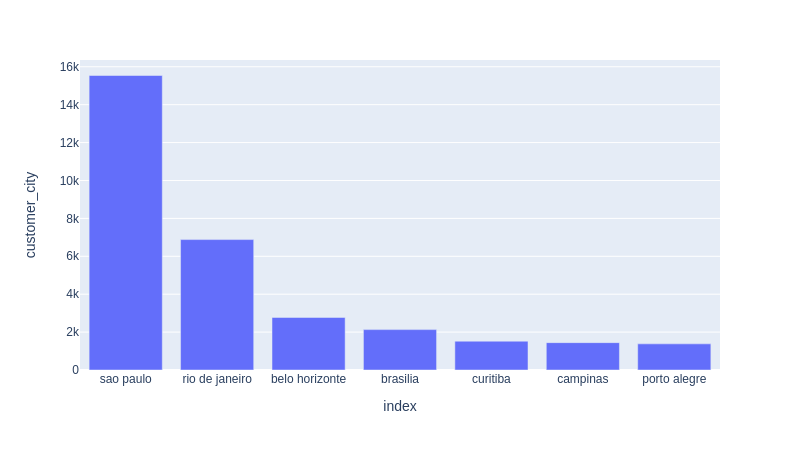

In [89]:
gitly = GitlyPlotter(renderer='github') #renderer='github' permite que os gráficos dinâmicos fiquem estaticos para aparecerem no notebook  do github
data = df_clientes.customer_city.value_counts().head(7).reset_index()
fig = px.bar(data,x='index', y='customer_city')
gitly.show(fig)

# Exploração (Aula - Tiago)

# Dataset Customers

## Estrutura do Dataset

In [30]:
# dimensões da minha tabela
df_clientes.shape

(99441, 5)

In [31]:
# valores unicos em cada coluna
df_clientes.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [32]:
# agg: agrega varias 'funções' ao mesmo tempo
# nunique: qtde de valores unicos na coluna
# count: qtde de valores não nulos na coluna
# size: qtde de elementos
df_clientes.agg(['nunique', 'count', 'size'])

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
nunique,99441,96096,14994,4119,27
count,99441,99441,99441,99441,99441
size,99441,99441,99441,99441,99441


## Informações para o Negócio

In [33]:
df_clientes.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [34]:
# Quantos clientes unicos
print('Qtde de clientes unicos: ', df_clientes.customer_unique_id.nunique())

Qtde de clientes unicos:  96096


In [35]:
# Removendo Duplicatas de valores
df_clientes_unique = df_clientes.drop_duplicates('customer_unique_id',keep='first')
df_clientes_unique.shape

(96096, 5)

In [36]:
#Top 5 estados
df_top5_estados = df_clientes_unique.customer_state.value_counts().head(5)

In [37]:
fig = px.bar(df_top5_estados,y='customer_state', title='Cinco estados com mais clientes')
gitly.show(fig)

In [38]:
#Top 5 cidades
df_top5_cidade = df_clientes_unique.customer_city.value_counts().head(5)
df_top5_cidade

sao paulo         14971
rio de janeiro     6611
belo horizonte     2671
brasilia           2066
curitiba           1462
Name: customer_city, dtype: int64

In [39]:
fig = px.bar(df_top5_cidade, y='customer_city', title='Cinco cidades com mais clientes', labels={'customer_city': 'Número de Clientes', 'index':'Cidades'})
gitly.show( fig )

In [40]:
### 

In [41]:
from plotly.subplots import make_subplots

fig = make_subplots( rows=1, cols=2, column_titles= ['Cidades com mais clientes', 'Estados com mais clientes'] )

fig.add_bar( x=df_top5_cidade.index , y=df_top5_cidade, row=1, col=1 )
fig.add_bar( x=df_top5_estados.index, y=df_top5_estados, row=1, col=2 )
fig.update_layout( dict( {'title':'Clientes: Cidades vs Estados'} ) )
fig.update_layout( dict( {'showlegend':False} ) )
gitly.show(fig)

In [42]:
# Top 5 Bairros

df_clientes.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [43]:
df_top4_bairros = df_clientes_unique.customer_zip_code_prefix.value_counts().head(4).rename('qtd_clientes_bairro').reset_index()
df_top4_bairros

,index,qtd_clientes_bairro
0,22790,136
1,22793,119
2,24220,113
3,24230,112


In [44]:
# fonte https://imasters.com.br/back-end/python-consulta-de-cep-com-pycepcorreios
import pycep_correios

def bairro_cidade( cep ):
    end = pycep_correios.get_address_from_cep( str( cep ) + '000' )
    return '{} / {}'.format(end['bairro'], end['cidade'])

df_top4_bairros['distrito'] = df_top4_bairros['index'].apply( bairro_cidade )
df_top4_bairros

,index,qtd_clientes_bairro,distrito
0,22790,136,Recreio dos Bandeirantes / Rio de Janeiro
1,22793,119,Barra da Tijuca / Rio de Janeiro
2,24220,113,Icaraí / Niterói
3,24230,112,Icaraí / Niterói


# Dataset Products

## Estrutura do Dataset

In [45]:
df_produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [46]:
df_produtos.shape

(32951, 9)

In [47]:
df_produtos.agg( ['nunique', 'count', 'size'] )

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
nunique,32951,73,66,2960,19,2204,99,102,95
count,32951,32341,32341,32341,32341,32949,32949,32949,32949
size,32951,32951,32951,32951,32951,32951,32951,32951,32951


In [48]:
df_produtos.product_category_name.fillna(value='nao informado',inplace=True)
df_produtos.agg( ['nunique', 'count', 'size'] )

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
nunique,32951,74,66,2960,19,2204,99,102,95
count,32951,32951,32341,32341,32341,32949,32949,32949,32949
size,32951,32951,32951,32951,32951,32951,32951,32951,32951


## Informações para o Negócio

In [49]:
# Como esta a distribuição?
fig = px.box(df_produtos.product_weight_g, y="product_weight_g")
gitly.show(fig)

In [50]:
df_produtos.product_weight_g.median()
df_produtos.product_weight_g.mean()

2276.4724877841513

In [51]:
valor = df_produtos.product_weight_g.median()
df_produtos.product_weight_g.fillna(value=valor, inplace=True)

In [52]:
df_categorias_mais_vendidas = df_produtos.product_category_name.value_counts().head(5).rename('qtd_prod_cat_ofertados')
df_categorias_mais_vendidas

cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: qtd_prod_cat_ofertados, dtype: int64

In [53]:
df_peso_medio_produtos = df_produtos.groupby( by='product_category_name' ).apply(np.mean)['product_weight_g']
df_peso_medio_produtos

product_category_name
agro_industria_e_comercio    5263.405405
alimentos                     923.414634
alimentos_bebidas            1307.932692
artes                        1691.763636
artes_e_artesanato           1164.578947
                                ...     
sinalizacao_e_seguranca      2969.817204
tablets_impressao_imagem      381.444444
telefonia                     236.506173
telefonia_fixa                660.827586
utilidades_domesticas        3020.793576
Name: product_weight_g, Length: 74, dtype: float64

In [54]:
df_mais_vendidos_peso_medio = pd.merge(left=df_categorias_mais_vendidas,right=df_peso_medio_produtos,how='left',left_index=True, right_index=True)
df_mais_vendidos_peso_medio

,qtd_prod_cat_ofertados,product_weight_g
cama_mesa_banho,3029,2456.405084
esporte_lazer,2867,2024.670736
moveis_decoracao,2657,3008.266842
beleza_saude,2444,1434.793781
utilidades_domesticas,2335,3020.793576


In [55]:
fig = px.bar(df_mais_vendidos_peso_medio, y='product_weight_g')
gitly.show(fig)

# Dataset Orders

## Estrutura da Tabela

In [56]:
df_compras.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [57]:
df_compras.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90733,81018,95664,459
count,99441,99441,99441,99441,99281,97658,96476,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


In [58]:
df_compras.fillna(method='ffill',inplace=True) # ffill: pega e repete o valor anterior nos faltantes
df_compras.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


## Informações para o Negócio

In [59]:
df_compras.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [60]:
df_status = df_compras.order_status.value_counts()

In [61]:
fig = px.bar(df_status, y='order_status', title='Status do pedido', log_y=True, labels={'order_status': 'Pedidos', 'index':'Status'})
gitly.show( fig )

In [62]:
df_compras.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [63]:
df_compras_dt = df_compras[['order_id', 'customer_id', 'order_status']].copy()
df_compras_dt.head(3)

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered


In [64]:
pd.to_datetime( df_compras['order_purchase_timestamp'], format='%Y-%m-%d')

0       2017-10-02 10:56:33
1       2018-07-24 20:41:37
2       2018-08-08 08:38:49
3       2017-11-18 19:28:06
4       2018-02-13 21:18:39
                ...        
99436   2017-03-09 09:54:05
99437   2018-02-06 12:58:58
99438   2017-08-27 14:46:43
99439   2018-01-08 21:28:27
99440   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]

In [65]:
lista_colunas_datas = list(df_compras.iloc[:13,3:].columns)
lista_colunas_datas

['order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [66]:
for coluna in lista_colunas_datas:
    df_compras_dt[coluna] = pd.to_datetime( df_compras[coluna], format='%Y-%m-%d')
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [67]:
df_compras_dt.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [68]:
df_compras_dt.iloc[0,:]

order_id                         e481f51cbdc54678b7cc49136f2d6af7
customer_id                      9ef432eb6251297304e76186b10a928d
order_status                                            delivered
order_purchase_timestamp                      2017-10-02 10:56:33
order_approved_at                             2017-10-02 11:07:15
order_delivered_carrier_date                  2017-10-04 19:55:00
order_delivered_customer_date                 2017-10-10 21:25:13
order_estimated_delivery_date                 2017-10-18 00:00:00
Name: 0, dtype: object

Eficiência na entrega

In [69]:
em_tempo = (df_compras_dt.order_delivered_customer_date <= df_compras_dt.order_estimated_delivery_date).sum()
em_tempo

89996

Atrasados

In [70]:
total = (df_compras_dt.order_delivered_customer_date <= df_compras_dt.order_estimated_delivery_date).count()
total

99441

In [71]:
atrasados = total - em_tempo
atrasados

9445

In [72]:
fig = px.pie( values=[em_tempo,atrasados], names=['Dentro do Estimado','Atrasados'], title='Efi')
fig.show()

In [73]:
df_compras_dt['delivery_interval'] = df_compras_dt.order_delivered_customer_date - df_compras_dt.order_purchase_timestamp
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40


In [74]:
df_compras_dt['numeric_month'] =  df_compras_dt.order_purchase_timestamp.dt.month
df_compras_dt['month'] =  df_compras_dt.order_purchase_timestamp.dt.month_name()
df_compras_dt['year'] =  df_compras_dt.order_purchase_timestamp.dt.year
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018


In [75]:
df_compras_dt['days_delivery_interval'] = df_compras_dt.delivery_interval.dt.days
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018,9


In [76]:
df_compras_mes =  df_compras_dt[['numeric_month','year','days_delivery_interval' ]].groupby( by='numeric_month' ).apply(np.mean)
df_compras_mes

,numeric_month,year,days_delivery_interval
numeric_month,,,
1,1.0,2017.900855,14.787334
2,2.0,2017.790785,19.312412
3,3.0,2017.728899,17.794198
4,4.0,2017.742695,13.106069
5,5.0,2017.650052,13.075381
6,6.0,2017.655227,11.290374
7,7.0,2017.609808,10.002326
8,8.0,2017.600572,7.801162
9,9.0,2017.002787,13.654588


In [77]:
df_compras_dt[['numeric_month']]

,numeric_month
0,10
1,7
2,8
3,11
4,2
...,...
99436,3
99437,2
99438,8
99439,1


In [78]:
fig = px.bar(df_compras_mes, y='days_delivery_interval', title='Média de prazo de entrega', labels={'days_delivery_interval': 'Dias decorridos', 'index':'Mês'})
gitly.show( fig )

In [79]:
df_n_compras_mes = df_compras_dt.numeric_month.value_counts()
df_n_compras_mes_plot = df_n_compras_mes.reset_index().sort_values(by='index', ascending=True)
df_n_compras_mes_plot

,index,numeric_month
7,1,8069
6,2,8508
3,3,9893
5,4,9343
1,5,10573
4,6,9412
2,7,10318
0,8,10843
11,9,4305
10,10,4959


In [80]:
fig = px.bar(df_n_compras_mes_plot, x ='index' , y='numeric_month', title='Compras por mês', labels={'numeric_month': 'Qtd. de Compras', 'index':'Mês'})
gitly.show( fig )

In [81]:
df_compras_dt.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [82]:
df_compras_dt.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')

XXXXXXXXXXXX

In [83]:
df_compras_dt.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,11,November,2017,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,2,February,2018,2


In [84]:
df_compra_pagamentos.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
